In [2]:
# Import Built-Ins
import datetime
from copy import deepcopy
# Import Third-Party
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm   

# Import Homebrew
#from utilities.functions import timeit, preprocess_trade_file
#from utilities.stocks import Stocks



pd.set_option('display.max_columns', None)
sns.set()

In [2]:
path = '/Users/australien/Documents/IESEG/Master 2/Thesis/BEDOFIH 2017/Data_structured_isin/Trades/NL0000226223/VHD_NL0000226223_20170120.csv'
data = preprocess_trade_file(path)

In [3]:
data.head()

,t_capital,t_price,t_d_b_en,t_d_s_en,t_id_b_fd,t_id_s_fd,t_b_sq_nb,t_s_sq_nb,t_b_account,t_s_account,t_q_exchanged,t_tr_nb,t_id_tr,t_agg,t_b_type,t_s_type,t_dtm_neg
0,175.60,10.975,2017-01-20,2017-01-20,17678972075,17678972006,302,192,1,2,16,1,2533202389,NaN,MIX,MIX,2017-01-20 09:00:04.000673
1,219.50,10.975,2017-01-20,2017-01-20,17678971991,17678972006,176,192,1,2,20,2,2533033240,NaN,MIX,MIX,2017-01-20 09:00:04.000704
2,669.48,10.975,2017-01-20,2017-01-20,17678971991,17678971992,176,177,1,1,61,3,2533334326,NaN,MIX,MIX,2017-01-20 09:00:04.000712
3,449.98,10.975,2017-01-20,2017-01-20,17678971991,17678971989,176,166,1,2,41,4,2533032714,NaN,MIX,MIX,2017-01-20 09:00:04.000720
4,87.80,10.975,2017-01-20,2017-01-20,17678971973,17678971865,150,15,1,1,8,5,2533334494,NaN,MIX,MIX,2017-01-20 09:00:04.000731


In [15]:
data.t_agg.isna()

0       True
1       True
2       True
3       True
4       True
        ... 
2863    True
2864    True
2865    True
2866    True
2867    True
Name: t_agg, Length: 2868, dtype: bool

In [4]:
total_volume = data['t_q_exchanged'].sum()
total_capital = data['t_capital'].sum()
data['t_q_exchanged_pct'] = data['t_q_exchanged']/total_volume
data['t_capital_pct'] = data['t_capital']/total_capital

In [5]:
stats = {}
stats['HFT_volume_pct_s'] = data[data['t_s_type'] == 'HFT']['t_q_exchanged_pct'].sum()
stats['MIX_volume_pct_s'] = data[(data['t_s_type'] == 'MIX') | (data['t_s_type'] == 'MIXED')]['t_q_exchanged_pct'].sum()
stats['NON_HFT_volume_pct_s'] = data[data['t_s_type'] == 'NON']['t_q_exchanged_pct'].sum()
stats['HFT_volume_pct_b'] = data[data['t_b_type'] == 'HFT']['t_q_exchanged_pct'].sum()
stats['MIX_volume_pct_b'] = data[(data['t_b_type'] == 'MIX') | (data['t_b_type'] == 'MIXED')]['t_q_exchanged_pct'].sum()
stats['NON_HFT_volume_pct_b'] = data[data['t_b_type'] == 'NON']['t_q_exchanged_pct'].sum()

for key, value in stats.items():
    print(f'{key}: {value*100:.2f}%')

HFT_volume_pct_s: 65.29%
MIX_volume_pct_s: 30.90%
NON_HFT_volume_pct_s: 3.81%
HFT_volume_pct_b: 34.90%
MIX_volume_pct_b: 60.21%
NON_HFT_volume_pct_b: 4.89%


In [6]:
data['t_b_type'].value_counts()

MIX    4633
HFT    3274
NON     325
Name: t_b_type, dtype: int64

<AxesSubplot:xlabel='t_dtm_neg'>

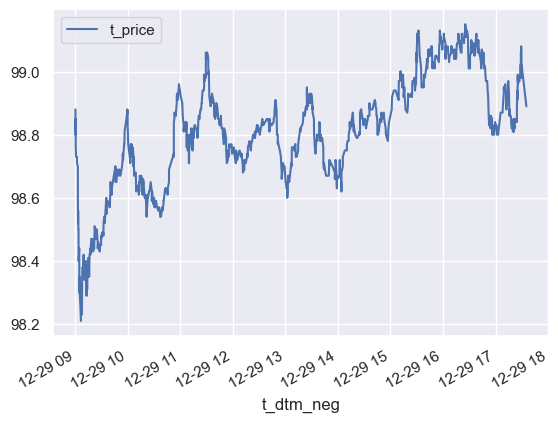

In [18]:
data.plot(y='t_price', x='t_dtm_neg')

In [11]:
import os
isin = 'FR0000125338'
origin = '/Volumes/Extreme ssd'

# Create dataframe
time_series = pd.DataFrame(columns=['Date', 'Price Close'])
trade_files = os.listdir(os.path.join(origin, 'BEDOFIH 2017 Structured', 'Trades', isin))

# For each file
trade_files = os.listdir(os.path.join(origin, 'BEDOFIH 2017 Structured', 'Trades', isin))
for file in trade_files:
    print(file)
    path = os.path.join(origin, 'BEDOFIH 2017 Structured', 'Trades', isin, file)
    data = preprocess_trade_file(path)

    # Get the date and the price
    date = pd.to_datetime(file[-12:-4], format="%Y%m%d").date()
    if data.empty == True:
        # If there were no trade, close price is close the day before
        price = [time_series.iloc[-1, -1]]
    else:
        price = [data.iloc[-1, data.columns.get_loc('t_price')]]
    # Format the row to append
    row = pd.DataFrame({
        #'Date': [data.iloc[-1, -1].date()],
        'Date': date,
        'Price Close': price
    })
    # Append the rows
    time_series = time_series.append(row)

# Calculate returns
time_series['Returns'] = time_series['Price Close'].pct_change()
# Save file
time_series.set_index('Date', inplace=True)
output_path = os.path.join(origin, 'Daily Time Series', isin + '_time_series_2017.csv')
time_series.to_csv(output_path)
del time_series

VHD_FR0000125338_20170102.csv
VHD_FR0000125338_20170103.csv
VHD_FR0000125338_20170104.csv
VHD_FR0000125338_20170105.csv
VHD_FR0000125338_20170106.csv
VHD_FR0000125338_20170109.csv
VHD_FR0000125338_20170110.csv
VHD_FR0000125338_20170111.csv
VHD_FR0000125338_20170112.csv
VHD_FR0000125338_20170113.csv
VHD_FR0000125338_20170116.csv
VHD_FR0000125338_20170117.csv
VHD_FR0000125338_20170118.csv
VHD_FR0000125338_20170119.csv
VHD_FR0000125338_20170120.csv
VHD_FR0000125338_20170123.csv
VHD_FR0000125338_20170124.csv
VHD_FR0000125338_20170125.csv
VHD_FR0000125338_20170126.csv
VHD_FR0000125338_20170127.csv
VHD_FR0000125338_20170130.csv
VHD_FR0000125338_20170131.csv
VHD_FR0000125338_20170201.csv
VHD_FR0000125338_20170202.csv
VHD_FR0000125338_20170203.csv
VHD_FR0000125338_20170206.csv
VHD_FR0000125338_20170207.csv
VHD_FR0000125338_20170208.csv
VHD_FR0000125338_20170209.csv
VHD_FR0000125338_20170210.csv
VHD_FR0000125338_20170213.csv
VHD_FR0000125338_20170214.csv
VHD_FR0000125338_20170215.csv
VHD_FR0000

In [45]:
data_test.head()

,Unnamed: 0


In [16]:
os.path.splitext(path)

('/Volumes/Extreme ssd/BEDOFIH 2017 Structured/Trades/FR0000125338/VHD_FR0000125338_20171229',
 '.csv')

In [23]:
data['t_q_exchanged'].value_counts()

90     282
70     112
50      76
100     76
10      75
      ... 
226      1
140      1
495      1
156      1
162      1
Name: t_q_exchanged, Length: 245, dtype: int64

In [22]:
# get totals
total_volume = data[(data['t_b_type'] == 'HFT')]['t_q_exchanged'].sum()
total_value = data[(data['t_b_type'] == 'HFT')]['t_capital'].sum()

# activity attributable to buy hft, slp
value_buy_HFT_SLP = data[(data['t_b_type'] == 'HFT') & (data['t_b_account'] == 6)]['t_capital'].sum()
volume_buy_HFT_SLP = data[(data['t_b_type'] == 'HFT') & (data['t_b_account'] == 6)]['t_q_exchanged'].sum()

# activity attributable to sell hft, slp
value_sell_HFT_SLP = data[(data['t_s_type'] == 'HFT') & (data['t_s_account'] == 6)]['t_capital'].sum()
volume_sell_HFT_SLP = data[(data['t_s_type'] == 'HFT') & (data['t_s_account'] == 6)]['t_q_exchanged'].sum()

# Get pct
pct_volume = (volume_buy_HFT_SLP + volume_sell_HFT_SLP) / (2*total_volume)
pct_value = (value_buy_HFT_SLP + value_sell_HFT_SLP) / (2*total_value)
print(f"Pct volume: {pct_volume}")
print(f"Pct value: {pct_value}")

Pct volume: 0.8722530552752551
Pct value: 0.8721550608495494


In [4]:
stocks = Stocks()
len(stocks.all)

104

In [11]:
import os
import pandas as pd

#count_max = 0
#count_min = 0
count_b_date_diff = 0
count_s_date_diff = 0

folder_path = '/Volumes/Extreme ssd/BEDOFIH 2017 Structured Formatted/Trades'


for isin in tqdm(stocks.all):
    files = os.listdir(os.path.join(folder_path, isin))
    for file in files:
        date_str = file[-12:-4]
        #date = pd.to_datetime(date_str, format="%Y%m%d").date()

        file_path = os.path.join(folder_path, isin, file)
        data_test = pd.read_csv(file_path)

        #count_max += data_test.t_price_max.count()
        #count_min += data_test.t_price_min.count()

        count_b_date_diff += (len(data_test.t_d_b_en) - data_test.t_d_b_en.value_counts()[0])
        count_s_date_diff += (len(data_test.t_d_s_en) - data_test.t_d_s_en.value_counts()[0])

        del data_test

100%|██████████| 104/104 [07:26<00:00,  4.30s/it]


In [12]:
#print(count_max)
#print(count_min)
print(count_b_date_diff)
print(count_s_date_diff)

365426
554157


In [16]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
api_key = 'FDCQGZHXBXV66JIR'
symbol = 
url = f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={symbol}&apikey={api_key}'
r = requests.get(url)
data = r.json()
#MarketCapitalization
print(data)

{'Symbol': 'IBM', 'AssetType': 'Common Stock', 'Name': 'International Business Machines', 'Description': 'International Business Machines Corporation (IBM) is an American multinational technology company headquartered in Armonk, New York, with operations in over 170 countries. The company began in 1911, founded in Endicott, New York, as the Computing-Tabulating-Recording Company (CTR) and was renamed International Business Machines in 1924. IBM is incorporated in New York. IBM produces and sells computer hardware, middleware and software, and provides hosting and consulting services in areas ranging from mainframe computers to nanotechnology. IBM is also a major research organization, holding the record for most annual U.S. patents generated by a business (as of 2020) for 28 consecutive years. Inventions by IBM include the automated teller machine (ATM), the floppy disk, the hard disk drive, the magnetic stripe card, the relational database, the SQL programming language, the UPC barcod

In [42]:
string = ''
data_for_str = stocks.data[(stocks.data.sbf_beg == False) | (stocks.data.sbf_end == False)][['isin_id', 'name']]
for index, row in data_for_str.iterrows():
    string = string + row['name'] + f' ({row.isin_id}), '

print(string)

ALD SA (FR0013258662), CGG (FR0013181864), Eramet SA (FR0000131757), Fnac Darty SA (FR0011476928), Havas (FR0000121881), Innate Pharma (FR0010331421), Maisons du Monde SA (FR0013153541), Maurel Prom (FR0000051070), Nokia (FI0009000681), SFR (Altice fr) (FR0011594233), Soitec SA (FR0013227113), Tarkett SA (FR0004188670), Technip SA (FR0000131708), TechnipFMC PLC (GB00BDSFG982), 


In [43]:
string = ''
data_for_str = stocks.data[stocks.data.days_of_data != 255][['isin_id', 'name']]
for index, row in data_for_str.iterrows():
    string = string + row['name'] + f' ({row.isin_id}), '

print(string)

ALD SA (FR0013258662), Aperam (nan), Arcelor Mittal (nan), Biomerieux SA (FR0013280286), Gemalto NL (nan), Havas (FR0000121881), Maurel Prom (FR0000051070), Rubis SCA (FR0013269123), SFR (Altice fr) (FR0011594233), Soitec SA (FR0013227113), Solvay (nan), Technip SA (FR0000131708), TechnipFMC PLC (GB00BDSFG982), Unibail-Rodamco-Westfield SE (FR0011321330), 


# Presence HFT during auctions

In [56]:
import os
import pandas as pd

types = ['MIX', 'HFT', 'NON']

#count_max = 0
#count_min = 0
count_b_date_diff = 0
count_s_date_diff = 0

folder_path = '/Volumes/Extreme ssd/BEDOFIH 2017 Structured Formatted/Trades'


for isin in tqdm(stocks.all):
    files = os.listdir(os.path.join(folder_path, isin))
    for file in files:
        date_str = file[-12:-4]
        #date = pd.to_datetime(date_str, format="%Y%m%d").date()

        file_path = os.path.join(folder_path, isin, file)
        data_test = pd.read_csv(file_path)

        #count_max += data_test.t_price_max.count()
        #count_min += data_test.t_price_min.count()

        #count_b_date_diff += (len(data_test.t_d_b_en) - data_test.t_d_b_en.value_counts()[0])
        #count_s_date_diff += (len(data_test.t_d_s_en) - data_test.t_d_s_en.value_counts()[0])

        a = data_test.t_b_type.value_counts()
        b = data_test.t_s_type.value_counts()

        for _ in a.index:
            if _ not in types:
                types.append(_)
        for _ in b.index:
            if _ not in types:
                types.append(_)

        del data_test
        


100%|██████████| 104/104 [07:50<00:00,  4.53s/it]


In [57]:
print(types)

['MIX', 'HFT', 'NON']


In [12]:
import os
import pandas as pd



results = pd.DataFrame()
folder_path = '/Volumes/Extreme ssd/BEDOFIH 2017 Structured Formatted/Trades'

for isin in tqdm(stocks.all):
    volume_hft_continuous = 0
    volume_mix_continuous = 0
    volume_total_continuous = 0
    volume_hft_auction = 0
    volume_mix_auction = 0
    volume_total_auction = 0
    
    value_hft_continuous = 0
    value_mix_continuous = 0
    value_total_continuous = 0
    value_hft_auction = 0
    value_mix_auction = 0
    value_total_auction = 0

    files = os.listdir(os.path.join(folder_path, isin))
    for file in files:
        file_path = os.path.join(folder_path, isin, file)
        trades = pd.read_csv(file_path)
        
        


        volume_hft_continuous += (trades[(trades.t_agg.isna() == False) & (trades.t_b_type == 'HFT')].t_q_exchanged 
                                  + trades[(trades.t_agg.isna() == False) & (trades.t_s_type == 'HFT')].t_q_exchanged).sum()
        volume_mix_continuous += (trades[(trades.t_agg.isna() == False) & (trades.t_b_type == 'MIX')].t_q_exchanged 
                                  + trades[(trades.t_agg.isna() == False) & (trades.t_s_type == 'MIX')].t_q_exchanged).sum()
        volume_total_continuous += trades[trades.t_agg.isna() == False].t_q_exchanged.sum()
        volume_hft_auction += (trades[trades.t_agg.isna() & (trades.t_b_type == 'HFT')].t_q_exchanged 
                                + trades[trades.t_agg.isna() & (trades.t_s_type == 'HFT')].t_q_exchanged).sum()
        volume_mix_auction += (trades[trades.t_agg.isna() & (trades.t_b_type == 'MIX')].t_q_exchanged 
                                + trades[trades.t_agg.isna() & (trades.t_s_type == 'MIX')].t_q_exchanged).sum()
        volume_total_auction += trades[trades.t_agg.isna()].t_q_exchanged.sum()
        
        value_hft_continuous += (trades[(trades.t_agg.isna() == False) & (trades.t_b_type == 'HFT')].t_capital 
                                  + trades[(trades.t_agg.isna() == False) & (trades.t_s_type == 'HFT')].t_capital).sum()
        value_mix_continuous += (trades[(trades.t_agg.isna() == False) & (trades.t_b_type == 'MIX')].t_capital 
                                  + trades[(trades.t_agg.isna() == False) & (trades.t_s_type == 'MIX')].t_capital).sum()
        value_total_continuous += trades[trades.t_agg.isna() == False].t_capital.sum()
        value_hft_auction += (trades[trades.t_agg.isna() & (trades.t_b_type == 'HFT')].t_capital 
                                + trades[trades.t_agg.isna() & (trades.t_s_type == 'HFT')].t_capital).sum()
        value_mix_auction += (trades[trades.t_agg.isna() & (trades.t_b_type == 'MIX')].t_capital 
                                + trades[trades.t_agg.isna() & (trades.t_s_type == 'MIX')].t_capital).sum()
        value_total_auction += trades[trades.t_agg.isna()].t_capital.sum()

        del trades

    volume_non_continuous = 2 * volume_total_continuous - (volume_hft_continuous + volume_mix_continuous)
    volume_non_auction = 2 * volume_total_auction - (volume_hft_auction + volume_mix_auction)
    value_non_continuous = 2 * value_total_continuous - (value_hft_continuous + value_mix_continuous)
    value_non_auction = 2 * value_total_auction - (value_hft_auction + value_mix_auction)
        
    results.loc[isin, 'volume_hft_continuous'] = volume_hft_continuous
    results.loc[isin, 'volume_mix_continuous'] = volume_mix_continuous
    results.loc[isin, 'volume_non_continuous'] = volume_non_continuous
    results.loc[isin, 'volume_total_continuous'] = volume_total_continuous
    results.loc[isin, 'volume_hft_auction'] = volume_hft_auction
    results.loc[isin, 'volume_mix_auction'] = volume_mix_auction
    results.loc[isin, 'volume_non_auction'] = volume_non_auction
    results.loc[isin, 'volume_total_auction'] = volume_total_auction
    

    results.loc[isin, 'value_hft_continuous'] = value_hft_continuous
    results.loc[isin, 'value_mix_continuous'] = value_mix_continuous
    results.loc[isin, 'value_non_continuous'] = value_non_continuous
    results.loc[isin, 'value_total_continuous'] = value_total_continuous
    results.loc[isin, 'value_hft_auction'] = value_hft_auction
    results.loc[isin, 'value_mix_auction'] = value_mix_auction
    results.loc[isin, 'value_non_auction'] = value_non_auction
    results.loc[isin, 'value_total_auction'] = value_total_auction

    #% that hft trade of total auction = vol hft auction/vol total auction
    results.loc[isin, 'volume_hft_auction_as_pct_of_total_auction'] = volume_hft_auction / (2*volume_total_auction)
    results.loc[isin, 'value_hft_auction_as_pct_of_total_auction'] = value_hft_auction / (2*value_total_auction)

    results.loc[isin, 'volume_mix_auction_as_pct_of_total_auction'] = volume_mix_auction / (2*volume_total_auction)
    results.loc[isin, 'value_mix_auction_as_pct_of_total_auction'] = value_mix_auction / (2*value_total_auction)

    results.loc[isin, 'volume_non_auction_as_pct_of_total_auction'] = volume_non_auction / (2*volume_total_auction)
    results.loc[isin, 'value_non_auction_as_pct_of_total_auction'] = value_non_auction / (2*value_total_auction)
    #% of what hft trade during day = vol hft auction / (vol hft auction + vol hft continuous)
    results.loc[isin, 'volume_hft_auction_as_pct_of_total_hft'] = volume_hft_auction / (volume_hft_auction + volume_hft_continuous)
    results.loc[isin, 'value_hft_auction_as_pct_of_total_hft'] = value_hft_auction / (value_hft_auction + value_hft_continuous)

    results.loc[isin, 'volume_mix_auction_as_pct_of_total_mix'] = volume_mix_auction / (volume_mix_auction + volume_mix_continuous)
    results.loc[isin, 'value_mix_auction_as_pct_of_total_mix'] = value_mix_auction / (value_mix_auction + value_mix_continuous)

    results.loc[isin, 'volume_non_auction_as_pct_of_total_non'] = volume_non_auction / (volume_non_auction + volume_non_continuous)
    results.loc[isin, 'value_non_auction_as_pct_of_total_non'] = value_non_auction / (value_non_auction + value_non_continuous)
    #% total day = vol hft auction / (volume_total_auction + volume_total_continuous)
    results.loc[isin, 'volume_hft_auction_as_pct_of_total'] = volume_hft_auction / (2 * (volume_total_auction + volume_total_continuous))
    results.loc[isin, 'value_hft_auction_as_pct_of_total'] = value_hft_auction / (2 * (value_total_auction + value_total_continuous))

    results.loc[isin, 'volume_mix_auction_as_pct_of_total'] = volume_mix_auction / (2 * (volume_total_auction + volume_total_continuous))
    results.loc[isin, 'value_mix_auction_as_pct_of_total'] = value_mix_auction / (2 * (value_total_auction + value_total_continuous))

    results.loc[isin, 'volume_non_auction_as_pct_of_total'] = volume_non_auction / (2 * (volume_total_auction + volume_total_continuous))
    results.loc[isin, 'value_non_auction_as_pct_of_total'] = value_non_auction / (2 * (value_total_auction + value_total_continuous))
    #% hft during continuous phase = volume_hft_continuous / volume_total_continuous
    results.loc[isin, 'volume_hft_continuous_as_pct_of_total_continuous'] = volume_hft_continuous / (2 * volume_total_continuous)
    results.loc[isin, 'value_hft_continuous_as_pct_of_total_continuous'] = value_hft_continuous / (2 * value_total_continuous)

    results.loc[isin, 'volume_mix_continuous_as_pct_of_total_continuous'] = volume_mix_continuous / (2 * volume_total_continuous)
    results.loc[isin, 'value_mix_continuous_as_pct_of_total_continuous'] = value_mix_continuous / (2 * value_total_continuous)

    results.loc[isin, 'volume_non_continuous_as_pct_of_total_continuous'] = volume_non_continuous / (2 * volume_total_continuous)
    results.loc[isin, 'value_non_continuous_as_pct_of_total_continuous'] = value_non_continuous / (2 * value_total_continuous)
    #break

results.to_excel('/Users/australien/Documents/IESEG/Master 2/Thesis/Ouputs/market_share_auction_continuous.xlsx')




100%|██████████| 104/104 [28:53<00:00, 16.67s/it]  


In [13]:
import pandas as pd
path = '/Volumes/Extreme ssd/orders/CH0012214059/VHOX_CH0012214059_20170102.parquet'
df = pd.read_parquet(path)